Hello Idan! :) 

My name is Olga. I'm happy to review your project today. 

The first time I see a mistake, I' will just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I will give you a more accurate hint at the next check.


Below you will find my comments - **please do not move, modify or delete them **.

You can find my comments in green, yellow or red boxes like this:


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Success. Everything is done succesfully.
</div>


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Remarks. Some recommendations.
</div>


<div class="alert alert-block alert-danger">
    
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
    
Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>


You can answer me by using this: 

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Overallv reviewer's comment</b> <a class="tocSkip"></a>
    
Christian, thank you for sending your project. You've done a really good job on it!

I like code style - very high level! Thank you for your detailed conclusions. They are wonderful. You did a great job! I am really impressed!

I'm glad to tell you that your project is now perfect! Your project has been accepted and you can go to the final sprint!

You're on the right track. Good luck! :)

In [1]:
pip install sidetable

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings

warnings.filterwarnings("ignore")

# Description


The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.<div>
One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you?<div> You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.<div>
Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.<div>
For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.<div>
In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.<div>
You should:<div>
- Learn to predict the probability of churn (for the upcoming month) for each customer
- Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service:
- Identify target groups
- Suggest measures to cut churn
- Describe any other patterns you see with respect to interaction with customers

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Great start with libraries and an introduction! :) </div>

## Step 1. Carry out exploratory data analysis (EDA)

### Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).

In [3]:

try:
    
    gym_data = pd.read_csv('D:\Tammy\Downloads\python notebook\ml project/gym_churn_us.csv')
    
    
except:
    
    gym_data = pd.read_csv('/datasets/gym_churn_us.csv')

In [4]:
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Column names need to be all lower case

In [5]:
gym_data.columns = gym_data.columns.str.lower()

In [6]:
gym_data.stb.missing()

,missing,total,percent
gender,0,4000,0.0
near_location,0,4000,0.0
partner,0,4000,0.0
promo_friends,0,4000,0.0
phone,0,4000,0.0
contract_period,0,4000,0.0
group_visits,0,4000,0.0
age,0,4000,0.0
avg_additional_charges_total,0,4000,0.0
month_to_end_contract,0,4000,0.0


We have no missing values

In [7]:
gym_data.sample(8)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
2397,1,0,1,0,1,1,0,29,74.526928,1.0,2,2.444695,2.415605,0
1114,0,1,1,0,1,12,1,33,200.071542,12.0,4,3.379991,3.398492,0
67,1,1,0,0,1,1,1,30,414.543384,1.0,3,2.848327,2.863163,0
1300,1,1,0,0,1,1,0,32,241.214123,1.0,1,0.000000,0.000000,1
566,1,1,1,1,1,1,0,30,164.145306,1.0,6,0.233330,0.074504,0
2828,0,1,1,1,1,12,0,24,167.018845,12.0,2,1.753041,1.893308,0
347,0,0,1,0,1,6,0,33,42.890433,6.0,4,1.466807,1.292824,0
1074,0,1,0,0,1,1,1,32,102.616374,1.0,4,1.235140,1.042658,0


It seems that `gender`, `near_location`, `partner`,	`promo_friends`, `phone`, `group_visits` and `churn` featurs are categorical, i.e: 0 = No, 1 = Yes 

In [8]:
gym_data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


From the table above we can learn that:<div> Gender is distributed evanly meaning about half of the gym's customers are men and  half women<div>
84.5% of the gym's customers live near by<div>
48.6% are employees of a partner company<div>
30% originally signed up through a "bring a friend" offer<div>
90% gave a phone number<div>
Up to 75% of contracts are for less than 6 months<div>
41% of the gym's customers take part in group sessions<div>
25% of customers are btween the ages of 18-27<div>
50% of customers are btween the ages of 28-31<div>
25% of customers are btween the ages of 32-41<div>
50% of customers have a LTV of over 3 months<div>
Overall churn rate is 26.5%

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Great! We checked duplicates and our dataset is good! Also our columns looks better now. Thank you for describe() method.It show us more infromation. :) 
</div>

### Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

In [9]:
churn = gym_data.groupby('churn').mean()
churn

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


As we can see here there are some interesting differences between those who stay and those who leave:
On average those who leave are younger, have a short contract, come for 1 session per week, only 27% take part in group sessions, only 18% signed up through a "bring a friend" offer, 35.5% are employees of a partner company and 24% of those who leave do not live near the gym's location

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Interesting!
</div>

### Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

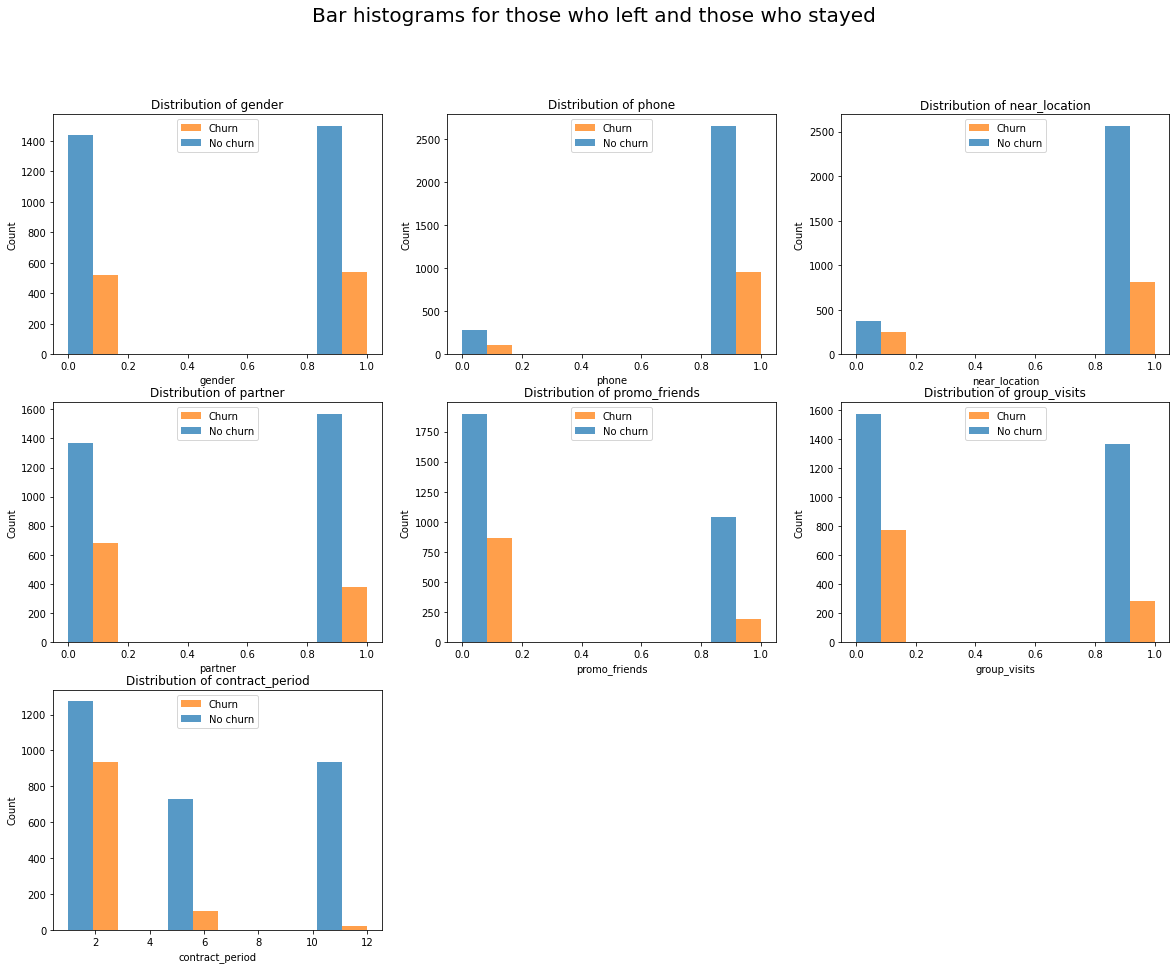

In [10]:
plt.subplots(figsize=(20, 15))
count=1
for col in ['gender', 'phone', 'near_location', 'partner', 'promo_friends', 'group_visits', 'contract_period']:
    plt.subplot(3,3,count)
    sns.histplot(data=gym_data, x=col, hue='churn', multiple="dodge", linewidth=0,bins=6)
    plt.title('Distribution of '+ col)
    plt.legend(labels=['Churn', 'No churn'],loc='upper center')
    count+=1
    plt.suptitle("Bar histograms for those who left and those who stayed", fontsize =20)
plt.show();

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Very good and clear graphs! Thank you for comparison and intresting facts!  It is visually attractive to show difference on the 1 graph. :) </div>

In the graphs above we can clearly see that churn for short contract period is very high, we can also see relativly high churn for customers who do not take part in group sessions, did not signed up through a "bring a friend" offer  and are not employees of a partner company

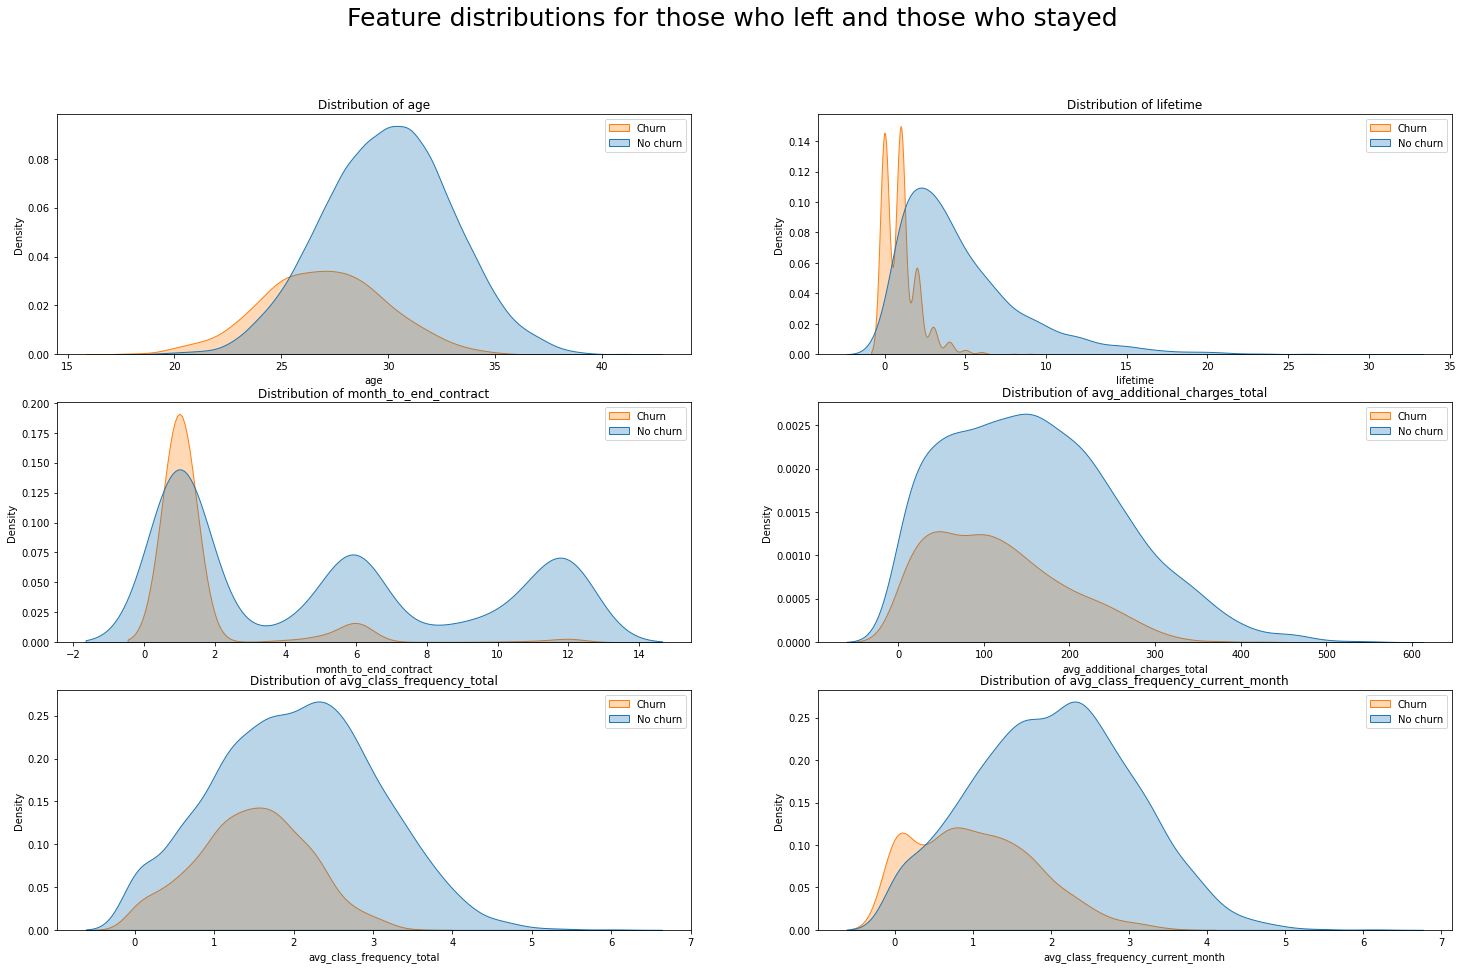

In [11]:
count=1
plt.subplots(figsize=(25, 15))
for col in ['age', 'lifetime', 'month_to_end_contract', 'avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.subplot(3,2,count)
    sns.kdeplot(data=gym_data, x=col, hue='churn', fill=True, alpha=.3)
    plt.title('Distribution of '+ col )
    plt.legend(labels=['Churn', 'No churn'])
    count+=1
    plt.suptitle("Feature distributions for those who left and those who stayed", fontsize =25)
plt.show();

In the graphs above we can see what we have already noticed: LTV value for churn is low, those who leave tend to be younger, come for 0-2 session per week

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Excellent idea to add such graphs! </div>



### Build a correlation matrix and display it.

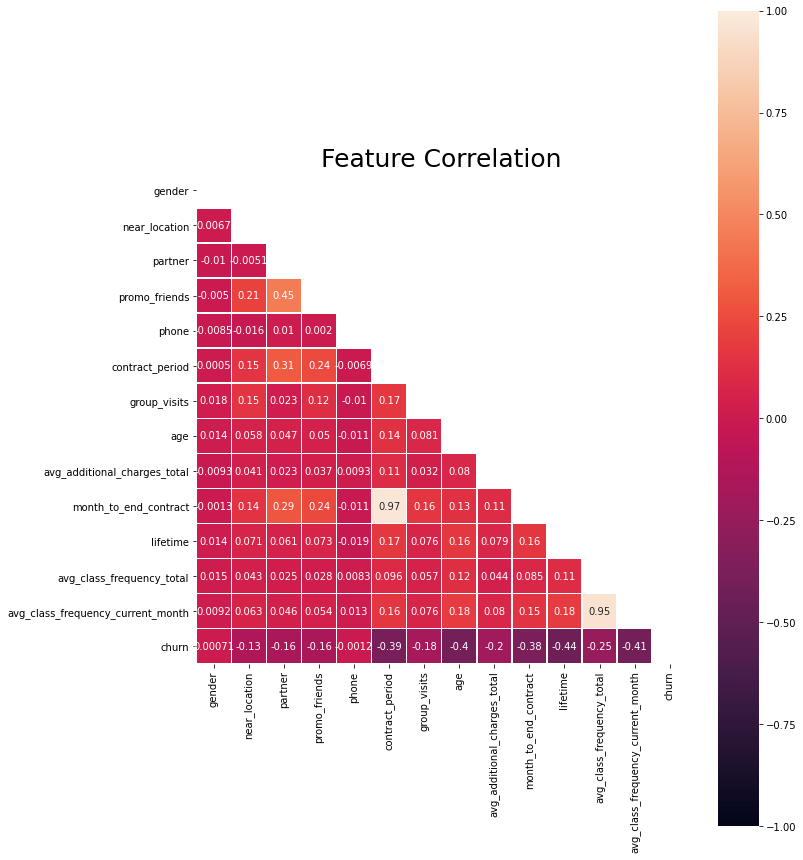

In [12]:
gym_corr = gym_data.corr()

mask = np.zeros_like(gym_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(gym_corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      )
#add the column names as labels
ax.set_yticklabels(gym_corr.columns, rotation = 0)
ax.set_xticklabels(gym_corr.columns)
plt.title('Feature Correlation',fontsize =25)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

The correlation matrix shows us that there are 2 features who are strongly correlated since one is derived out of the other: `avg_class_frequency_total` with`avg_class_frequency_current_month` and `month_to_end_contract` with `contract_period`, this could cause problems due to Multicollinearity, we should consider removing one feature from each pair.<div>
    We can also see that churn is not strongly correlated with any of our featurs, however it is moderatly negativly correlated with: `lifetime` -0.44, `avg_class_frequency_current_month` -0.41, `age` -0.4 and `contract_period` -0.39.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Well done! We have great heatmap for different features. Thank you for your excellent conclusions!</div>

## Step 2. Build a model to predict user churn

### Build a binary classification model for customers where the target feature is the user's leaving next month Divide the data into train and validation sets using the train_test_split() function. Train the model on the train set with two methods:
- logistic regression
- random forest

In [13]:
# divide the data into features (the X matrix) and a target variable (y)
X = gym_data.drop('churn', axis = 1)
y = gym_data['churn']

In [14]:
# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [15]:
# create a StandardScaler object and apply it to train set
scaler = StandardScaler()

# train the scaler and transform the matrix for train set
X_train_st = scaler.fit_transform(X_train)

# apply standardization to the feature matrix for test set
X_test_st = scaler.transform(X_test)

We standartized our data. Now we can train and test our models

In [16]:
models = [LogisticRegression(random_state=0),RandomForestClassifier(random_state=0)]

### Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?

In [17]:
# define the function that will output our metrics
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [18]:
# define the algorithm for the logistic regression model
lr_model = LogisticRegression(random_state=0)
# train the model
lr_model.fit(X_train_st, y_train)
# use the trained model to make predictions
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# print all metrics
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')

# define the algorithm for the new random forest model
rf_model = RandomForestClassifier(random_state=0) # write your code here
# train the random forest model
rf_model.fit(X_train_st, y_train)
# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st)# write your code here
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]# write your code here
# print all metrics
print_all_metrics(y_test,rf_predictions,rf_probabilities, title = 'Metrics for random forest:')

Metrics for logistic regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97
Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97


Above we cas see the metrics for both models:<div> Accuracy(share of accurate pridictions among all predictions): logistic regression 92%, random forest 91%. <div> Precision(the share of correct answers only in the target class): logistic regression 85%, random forest 83%. <div> Recall(the number of real class 1 objects we were able to discover): logistic regression 83%, random forest 78%. <div> As we can see matrics for LR model are consistantly better, most importantly is the Precision metric since we will spend resources and money if we get an allert that a customer is about to quit, so we better be as sure as we can that our prediction is true so we wont waste resources and money. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Great! Yes, our difference is not big, but we have it. Logistic regression is a winner! :) 
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
It would be good to add a graph here. We can compare features importance. Could you look at this and try to plot a graph?
    
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
</div>

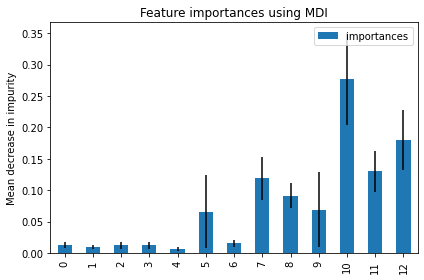

In [21]:
features = pd.DataFrame({'feature': X_train.columns, 'importances': rf_model.feature_importances_}) 
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
#forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
features.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Step 3 . Create user clusters
Set aside the column with data on churn and identify object (user) clusters:
Standardize the data.

In [ ]:
# the obligatory standardization of data before passing it to the algorithm
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.

In [ ]:
linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show()

The dendogram above seems to indicate we have 4 clusters.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Well done! You standardize the data and now we have intresting dendrogram. 4-5 clasters is enough. You are right. :)  </div>

### Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)

In [ ]:
# define the k_means model with 5 clusters
km = KMeans(n_clusters = 5)
# predict the clusters for observations (the algorithm assigns them a number from 0 to 4)
labels = km.fit_predict(X_sc)

# store cluster labels in the field of our dataset
gym_data['cluster_km'] = labels

We added the cluster number column to our df.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Good idea!  </div>

### Look at the mean feature values for clusters. Does anything catch your eye?

In [ ]:
# get the statistics of the mean feature values per cluster
gym_data.groupby(['cluster_km']).mean()

Here we can see that:<div> Gender is eveanly divided between all clusters<div> C0 has only people who do not live near the gym and second highst churn<div>  C2 has the longest contract periods and smallest churn<div> C1 has the highest churn, shortest contract and least amount of promo friends

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Let's visualise it!  </div>

### Plot distributions of features for the clusters. Do you notice anything?

We'll split our data to numerical and categorical vars. for numerical we'll plot box-plots and histograms

In [ ]:
num_var = gym_data[['contract_period', 'age','avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month', 'cluster_km']]
cat_var = gym_data[['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits','churn', 'cluster_km']]

In [ ]:
print('Numeric Featurs')
for i in num_var.columns:
    fig = px.box(x = num_var['cluster_km'], y = num_var[i],color = num_var['cluster_km'], title = i,labels={
                     "x": "Cluster","y":
i                     
                 })
    fig.show()    

Box-plots:<div>C2 and C4 have the highest median LTV of 4 months C0 2 months and C1 have the shortest 1 month <div> C4 has the highest median avg class in current month 2.7 C1 the lowest 1.01<div>

In [ ]:
for i in num_var.columns:
    fig = px.histogram(num_var, x = i, color = 'cluster_km', barmode='overlay', title = i)
    fig.show()

In the histograms we can see much of the same as in the box-plots.<div>C1 has only 1 month contracts, most of the younger customers, and the least classes.

Next we'll plot histograms for categorical vars

In [ ]:
print('Categorical Featurs')
for i in cat_var.columns:
    fig = px.histogram(cat_var, x = 'cluster_km', color = i , title = i)
    fig.show()

Here we can see that C1 and C0 who havs the highest churn rates also have the least amount partner employees and promo friends, so they pay full price and take short contracts. they also have the least amount of group visits.<div> C3 which has the third highest churn rate(26%) 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
It was excellent idea to plot different type of graphs here! We can see the distribution and comarison different clusters! Very good!

</div>

### Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

In [ ]:
cr = gym_data.groupby(['cluster_km'])['churn'].mean().reset_index()
cr.rename(columns={'cluster_km': 'Cluster','churn':'Churn Rate'}, inplace=True)
cr

As we had seen before C4 has the highest churn rate(52%) also C2(45%)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Yep!</div>

## Step 4. Come up with conclusions and basic recommendations on working with customers

**Pre-processing:**
- we have data on 4000 customers 
- no missing values or duplicates
- some of the customer features are categorical<div>
    
**EDA:**
- Gender is distributed evanly <div>
- 84.5% of the gym's customers live near by<div>
- 48.6% are employees of a partner company<div>
- 30% originally signed up through a "bring a friend" offer<div>
- 90% gave a phone number<div>
- Up to 75% of contracts are for less than 6 months<div>
- 41% of the gym's customers take part in group sessions<div>
- 25% of customers are btween the ages of 18-27<div>
- 50% of customers are btween the ages of 28-31<div>
- 25% of customers are btween the ages of 32-41<div>
- 50% of customers have a LTV of over 3 months<div>
- For customers who churned:<div>We can clearly see that churn for short contract period is very high, we can also see relativly high churn for customers who do not take part in group sessions, did not signed up through a "bring a friend" offer and are not employees of a partner company, also those who leave tend to be younger and come for 0-2 session per week.<div>
- Overall churn rate is 26.5%<div>
    
**Churn prediction model:**<div>
We tested two models: Logistic regression and Random forest<div>
- Accuracy: logistic regression 92%, random forest 91%.
- Precision: logistic regression 85%, random forest 83%.
- Recall: logistic regression 83%, random forest 78%.<div>
As we can see matrics for LR model are consistantly better, most importantly is the Precision metric since we will spend resources and money if we get an allert that a customer is about to quit, so we better be as sure as we can that our prediction is true so we wont waste resources and money.<div>
    
**User clusters:**<div> 
Gender is eveanly divided between all clusters<div>
C4 has the highest median avg class in current month 2.8, and the highest median LTV of 4 months. churn rate 7.2%<div>
C2 has the longest contract periods and smallest churn 2.2% and and the highest median LTV of 4 months<div>
C0 has only people who do not live near the gym and second highst churn 44%, the least amount partner employees and promo friends, so they pay full price and take short contracts. they also have the least amount of group visits.<div>
C3 has only people who used friend promo, and has the third highest churn rate 26%<div>
C1 has the highest churn 52%, only 1 month contracts, most of the younger customers, the least classes and least amount of promo friends, the lowest LTV 1.08<div>
C1 and C0 who havs the highest churn rates also have the least amount partner employees and promo friends, so they pay full price and take short contracts. they also have the least amount of group visits.<div>

**Recommendations:**
1. It seems that the feature which affect churn the most is the contract period, so we should put more emphasis on sighning longer contracts. Maybe through some promotion.
1. We should try to retain our younger customers who in general do not have discounts or promotions, by creating a promotion for this audience. Also we could create new classes more oriented to the young.
1. Another factor that influences churn is the number of times a user comes per week and if they participate in group classes. since we have 90% of phone numbers we could create some messaging campaign that offers users another weekly session or group class for a reduced rate
 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Wow! An excellent final! We can see information about our research and very good recommendations.Great job! :) </div>